Para conocer mejor la distribución gaussiana, vamos a dejar a un lado las notas obtenidas en el examen y vamos a concentrarnos en las críticas de películas.  
  
Estas son las opiniones (calificadas de 0 a 5) obtenidas por una película, donde 5 es la mejor nota que puede obtener la película: las famosas 5 estrellas que podemos encontrar en todos los sitios de críticas de cine.  
  
Opinión (Xi), Cantidad de votantes (Ni)  
5, 40  
4, 99  
3, 145  
2, 133  
1, 96  
0, 40   

In [12]:
import pandas as pd
import numpy as np
from math import floor, ceil
print('Done')

Done


In [2]:
#pasamos los datos a un dataframe
df_criticas = pd.DataFrame(columns=['Xi', 'Ni'])
df_criticas['Xi'] = [5,4,3,2,1,0]
df_criticas['Ni'] = [40,99,145,133,96,40]

# lo guardamos en un csv
df_criticas.to_csv('data/criticas.csv', index=False)

# y lo mostramos
df_criticas

,Xi,Ni
0,5,40
1,4,99
2,3,145
3,2,133
4,1,96
5,0,40


# Media

In [3]:
df_criticas['Xi*Ni'] = df_criticas['Xi'] * df_criticas['Ni']
df_criticas

,Xi,Ni,Xi*Ni
0,5,40,200
1,4,99,396
2,3,145,435
3,2,133,266
4,1,96,96
5,0,40,0


In [7]:
suma_frecuencias = df_criticas['Ni'].sum()
suma_productos = df_criticas['Xi*Ni'].sum()

media = round( suma_productos / suma_frecuencias, 2)
print(f'La media es {media}')

La media es 2.52


# Varianza
Esto nos permite calcular la varianza haciendo la suma de la columna que acabamos de crear dividida entre la suma de las frecuencias:

Varianza = (246,21 + 217,14 + 33,54 + 35,82 + 221,50 + 253,81)/553 = 1,82

Por último, podemos terminar con la desviación típica calculando la raíz cuadrada de la varianza:

In [5]:
df_criticas['Ni*(Xi-media)^2'] = round( df_criticas['Ni'] * (df_criticas['Xi'] - media)**2, 2)
df_criticas

,Xi,Ni,Xi*Ni,Ni*(Xi-media)^2
0,5,40,200,246.22
1,4,99,396,217.15
2,3,145,435,33.55
3,2,133,266,35.82
4,1,96,96,221.50
5,0,40,0,253.81


In [8]:
suma_prod2 = df_criticas['Ni*(Xi-media)^2'].sum()

varianza = round( suma_prod2 / suma_frecuencias, 2)
print(f'La varianza es {varianza}')

desv_tipica = round( np.sqrt(varianza), 2)
print(f'La desviación típica es {desv_tipica}')

La varianza es 1.82
La desviación típica es 1.35


# Percentiles
Ahora le toca a usted examinar el reparto de las observaciones en función de las desviaciones entre la media y la desviación típica que permite definir los 68 %, 95 % y 97 % de repartos.

In [42]:
frecs1 = df_criticas['Ni'][2:5].sum() 
porc1 = round( frecs1/suma_frecuencias, 2)
print(f'Porcentaje de los datos se encuentran entre [1,3]: {porc1*100}%')

Porcentaje de los datos se encuentran entre [1,3]: 68.0%


In [46]:
frecs2 = df_criticas['Ni'][2:6].sum() 
porc2 = round( frecs2/suma_frecuencias, 2)
print(f'Porcentaje de los datos se encuentran entre [0,3]: {porc2*100}%')

Porcentaje de los datos se encuentran entre [0,3]: 75.0%


In [47]:
frecs1 = df_criticas['Ni'][1:5].sum() # 374
porc1 = round( frecs1/suma_frecuencias, 2)
print(f'Porcentaje de los datos se encuentran entre [1,4]: {porc1*100}%')

Porcentaje de los datos se encuentran entre [1,4]: 86.0%


## 68 %

Pero al aplicar la fórmula que usa la media y la desviación típica, nos sale que el intervalo va hasta el 4 porque nos calcula el intervalo de los datos en el que se encuentran el 68,3% de las observaciones.

In [20]:
LI_1 = max( floor(media - desv_tipica), 0)
LS_1 = min( ceil(media + desv_tipica), 5)
print(f'El 68% de los datos se encuentran en el intervalo [{LI_1}, {LS_1}]')


El intervalo de confianza es [1, 4]


## 95 % 

In [ ]:
# % de valores entre 1 y 4: 145 + 133 + 96 = 374
frecs = df_criticas['Ni'][2:5].sum() # 374
porcentaje = round( frecs/suma_frecuencias, 2)
print(f'El {porcentaje*100}% de los datos se encuentran entre 1 y 3')

In [18]:
LI_2 = max( floor(media - 2*desv_tipica), 0)
LS_2 = min( ceil(media + 2*desv_tipica), 5)
print(f'El 95% de los datos se encuentran en el intervalo [{LI_2}, {LS_2}]')


El intervalo de confianza es [0, 5]


## 97 %

In [ ]:
# % de valores entre 1 y 3: 145 + 133 + 96 = 374
frecs = df_criticas['Ni'][2:5].sum() # 374
porcentaje = round( frecs/suma_frecuencias, 2)
print(f'El {porcentaje*100}% de los datos se encuentran entre 1 y 3')

In [19]:
LI_3 = max( floor(media - 3*desv_tipica), 0)
LS_3 = min( ceil(media + 3*desv_tipica), 5)
print(f'El 97% de los datos se encuentran en el intervalo [{LI_3}, {LS_3}]')


El intervalo de confianza es [0, 5]


# Histograma

In [27]:
import matplotlib.pyplot as plt

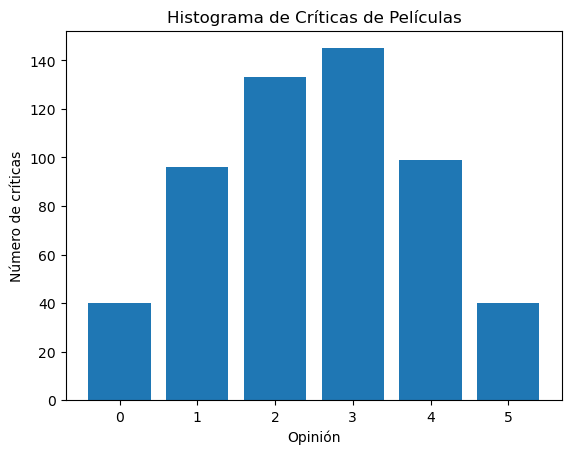

In [33]:
opiniones = df_criticas['Xi']
criticas = df_criticas['Ni']

# Histograma
plt.bar(opiniones, criticas, )


plt.title("Histograma de Críticas de Películas")
plt.xlabel("Opinión")
plt.ylabel("Número de críticas")

plt.show()